## Machine learning for structured data - Classification

In this chapter we will discuss *traditional* machine learning models, meaning that we postpone the discussion of deep learning models to Chapters 9 and 11. However, this chapter's importance should not be underestimated as most of the accounting datasets are such that deep learning models do not offer benefits.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
{
    "tags": [
        "remove-cell",
    ]
}
plt.xkcd()

### Introduction to classification
Classification means predicting the class of given data points. Sometimes, these classes are called labels or categories. If we want to give a more formal definition of classification, it is the task of estimating a function *f* from input variables *x* to **discrete** output variable *y*.

Examples of classification tasks in accounting include:
* Fraud detection in auditing. An ML model is trained to recognise fraud, for example, in the financial statements of a firm.
* Bankruptcy detection. An ML model is trained to recognise companies that are in danger of bankrupt.
* To detect accounting misstatements.
* Customer churn prediction
* Employee churn prediction
* Categorise company disclosure
* The credit approval of bank's customers

#### Supervised and unsupervised classification

The classification ML models' training can be divided broadly into two different types, supervised and unsupervised training. The key difference is that there is an outcome variable guiding the learning process in the supervised setting.

In supervised machine learning models, the predictions are based on the already known input-output pairs $(x_1,y_1),...,(x_N,y_N)$. During training, the model presents a prediction $y_i$ for each input vector $\bar{x_i}$. The algorithm then informs the model whether the prediction was correct or gives some kind of error associated with the model's answer. The error is usually characterised by some loss function. For example, if the model gives a probability of a class in a binary setting, the common choice is binary cross-entropy loss: $$BCE=\frac{1}{N}\sum_{i=1}^N{y_i\cdot\log{\hat{y_i}}+(1-y_i)\cdot\log{1-\hat{y_i}}}$$

More formally, supervised learning can be considered as density estimation where the task is to estimate the conditional distribution $P(y|\vec{x})$. There are two approaches for supervised classification:

* Lazy learning, where the training data is stored, and classification is accomplished by comparing a test observation to the training data. The correct class is based on the most similar observation in the training data. K-nearest neighbours -classifier is an example of a lazy learner. Lazy learners do not take much time to train, but the prediction step can be computationally intensive.
* Eager learning, where a classification model based on the given training data is constructed and used to predict the correct class of a test observation. The model aims to model the whole input space. An example of an eager learner is a decision tree. Opposite to lazy learners, eager learners can predict with minimal effort, but the training phase is computationally intensive.

In unsupervised learning, there is no training set with correct output values, and we observe only the features. Our task is rather to describe how the data are organised or clustered. More formally, the task is to directly infer the properties of the distribution $P(\vec{x})$ for the input values $(x_1,x_2,...,x_N)$.

For a low-dimensional problem (only a few features), this is an easy task because there are efficient methods to estimate, for example, 3-dimensional probability distribution from observations. However, things get complicated when the distribution is high-dimensional. Then, the goal is to identify important low-dimensional manifolds within the original high-dimensional space that represent areas of high probability. Another simple option is to use descriptive statistics to identify key characteristics of the distribution. Cluster analysis generalises this approach and tries to identify areas of high probability within the distribution.

Thus, with supervised learning, things are in some sense easier because we have clear goals. Furthermore, comparing different ML models is easier in the supervised setting, where metrics like prediction accuracy can be used to evaluate the models. Also, the training is more straightforward because, for example, cross-validation can be used to control that the model does not overfit. With unsupervised learning, there is no clear measure of success, and the goodness of the model is much more difficult to estimate. There, the validity of the model predictions is difficult to ascertain, and often heuristic arguments have to be used to motivate the results of the model.

#### Binary, multi-class and multi-label classification

The simplest classification model is a binary classifier, which tries to classify elements of a set into two groups. Many classification applications in accounting are binary classification tasks, like bankruptcy or fraud detection. When training a binary classifier model, the easiest situation is when the two groups are of equal size. However, this is often not the case, like, for example, in bankruptcy prediction, where often only a few per cent of the observations are of financially distressed companies. In these cases, overall accuracy is not the best measure of performance. Instead, the relative proportion of different error types is the correct thing to analyse. The mistake of predicting a distressed company when, in reality, it is not and predicting a healthy company when, in reality, it is distressed are not equally serious mistakes.

Multiclass classification aims to identify the correct class for instances from more than two classes. The famous example present in almost every ML book is the MNIST dataset of 28x28 images of handwritten digits and the task of identifying the correct digit from these images. An example from accounting could be the task of classifying accounting texts (for example, 10-Ks) using natural language processing algorithms. Some binary classifiers are easy to transform as multiclass algorithms, like binary logistic regression. However, for some binary classifiers, it is not easily achievable.

Multi-label classification changes the multiclass setting so that each instance can have multiple classes (labels). More formally, multi-label classification is the problem of finding a mapping from instance *x* to a vector of probabilities *y*. The vector contains a probability for each class.

#### Logistic regression
Logistic regression, sometimes called the logistic model or logit model, is usually used to predict the probability of a binary class. However, it is easy to change the setting so that the model gives a probability to several classes that sum up to one.

Logistic regression solves the issues when we want to use regression to predict probabilities. In principle, ordinary regression could be used to predict the probability of a binary class. The problem with this approach is that the predicted value is not limited between 0 and 1. By adding a logistic function after an ordinary regression model,$$p(x)=\frac{1}{1+e^{-\beta_0+\sum_{i=1}^n{\beta_ix_i}}},$$ we can force the prediction to be between 0 and 1.

One of the seminal papers in bankruptcy prediction is Ohlson (1980). He was one of the first to use Logistic regression for bankruptcy prediction. (*Ohlson, J. A. (1980). Financial ratios and the probabilistic prediction of bankruptcy. Journal of Accounting Research, 18(1), 109-131.*) --> [Link to paper](https://www.jstor.org/stable/2490395?seq=1)

![Logistic](./images/logistic_curve.jpeg)

**Simple example of logistic regression**

Let's analyse why logistic regression is better when we want to predict probabilities.

The following command creates random values where the first 50 are distributed close to zero and the following 50 close to ten. The first 50 companies are thought of being low-leverage companies, and the last 50 high-leverage companies. The purpose is to simulate data that is meaningful to model with logistic regression.

Numpy *append*-function is used to merge two Numpy arrays. The distribution of the arrays is visualised below.

In [4]:
leverage_metric_np = np.append(np.random.chisquare(2,size=50),-np.random.chisquare(2,size=50)+10)

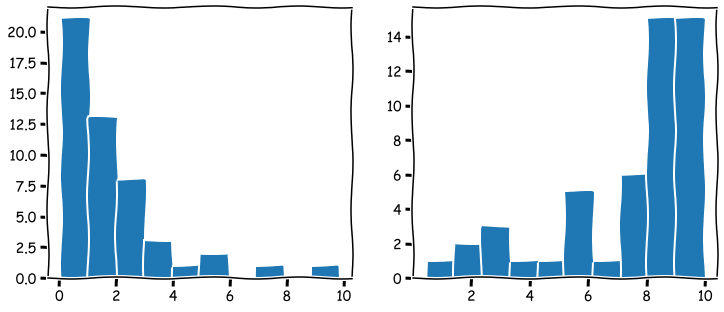

In [5]:
# Let's visualise the distributions of the first and the last 50 instances.
fig, axs = plt.subplots(1,2,figsize=(12,5))
axs[0].hist(leverage_metric_np[0:50])
axs[1].hist(leverage_metric_np[50:100])
plt.show()

The following command creates a variable, which describes whether the company bankrupt.

In [6]:
distress_np = np.append(np.zeros(50),np.ones(50))

As we can see from the figure, there is a higher risk for the high-leverage companies to bankrupt. Thus, we simulated data that indicates a connection between high leverage and a higher risk of bankrupt.

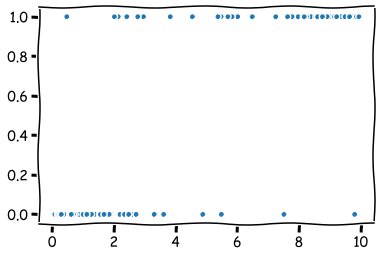

In [7]:
plt.plot(leverage_metric_np,distress_np,'.')
plt.show()

The following reshape operation is needed for Scikit-learn to recognise the data correctly.

In [8]:
leverage_metric_np = leverage_metric_np.reshape(-1, 1)

Let's fit the data first to an ordinary linear regression model. As I mentioned previously, it is possible, but we will soon see how this approach has problems.

Linear regression is easy to implement with Scikit-learn.

In [9]:
import sklearn.linear_model as sk_lm

In [10]:
# Create the model
model = sk_lm.LinearRegression()

In [11]:
# Fit the model to the data.
model.fit(leverage_metric_np,distress_np)

LinearRegression()

As you can see, we can fit an OLS model to the data, but interpreting it is difficult. For example, with the leverage metric above 9, the predicted value is over 1. What does that mean? At least not a probability.

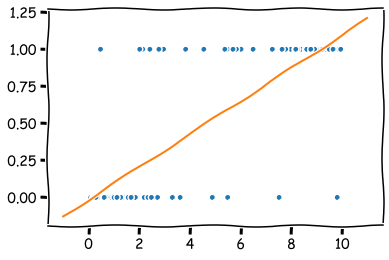

In [12]:
x = np.linspace(-1,11,50) # Sample x-points that are used to draw the line below.
plt.plot(leverage_metric_np,distress_np,'.') # This plots the original data points.
plt.plot(x,x*model.coef_+model.intercept_) # This plots the orange line.
plt.show()

Let's proceed by fitting a logistic regression model.

In [13]:
# Create the model
logit_model = sk_lm.LogisticRegression()

In [14]:
# Fit the model to the data.
logit_model.fit(leverage_metric_np,distress_np)

LogisticRegression()

Now the prediction describes a probability of financial distress and the domain is restricted between 0 and 1. The results are much easier to interpret.

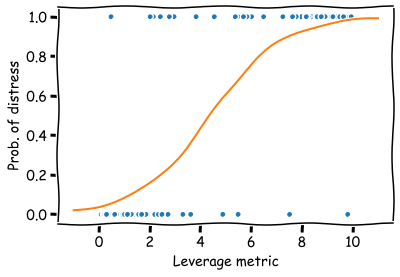

In [15]:
x = np.linspace(-1,11,50)
plt.plot(leverage_metric_np,distress_np,'.')
# Reshape is again needed for Scikit-learn to recognise the data correctly
plt.plot(x,logit_model.predict_proba(x.reshape(-1,1))[:,1]) 
plt.xlabel('Leverage metric')
plt.ylabel('Prob. of distress')
plt.show()

#### Linear discrimant analysis

Linear discriminant analysis is one of the simplest approaches for classification as it aims to create boundaries between classes using a linear combination of features. It is easily applied for two and more classes. Although the algorithm can be used for classification, more often it is used for dimensionality reduction. One of the best-known statisticians of the 20th century, R.A. Fisher, is credited to be the inventor of Linear Discriminant Analysis. He invented the binary version of LDA in 1936.

Edward Altman's famous bankruptcy prediction model uses Linear discriminant analysis. (*Altman, Edward I. (September 1968). "Financial Ratios, Discriminant Analysis and the Prediction of Corporate Bankruptcy". Journal of Finance. 23 (4): 189–209.*) --> [Link to paper](https://www.jstor.org/stable/2978933?seq=1)

![LinDis](./images/LinDis.png)

#### K Nearest neighbours

The K nearest neighbours algorithm is an example lazy classification method. It stores training data and classifies new instances based on the similarity with specific training data values. The similarity can be measured in several ways, *cosine similarity* being one example. KNN is a good approach when there is little knowledge about the model that could describe our accounting dataset. The best we can do is to predict the new instance to be in the same class as the most similar instances in the training data.

![KNN](./images/knn.svg)

The algorithm is very sensitive to the *K* parameter that describes how many nearest neighbours the prediction is based on. *K=1* means that we select the class to be the same as the nearest single training observation. *K=10* means that pick the mode class of the ten nearest training observations. Below is an example where *K=1*. As you can see, this model overfits a lot and is very sensitive to noise. However, *K* cannot be too large either because it decreases the method's accuracy as too distant observations are considered in the prediction.

![1NN_map](./images/Map1NN.png)

Huang & Li (2011) use KNN for multi-label classification of risk factors in SEC 10-K. *(Ke-Wei Huang and Zhuolun Li. 2011. A multi-label text classification algorithm for labelling risk factors in SEC form 10-K. ACM Trans. Manage. Inf. Syst. 2, 3, Article 18)* --> [Link to paper](https://dl.acm.org/doi/abs/10.1145/2019618.2019624)

#### Naive Bayes
Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem $$P(A|B)=\frac{P(B|A)P(A)}{P(B)}.$$

The common principle behind all of these algorithms is the assumption that features are independent of each other, and we can classify them separately.

An example of Naive Bayes applications in accounting is Ngai et al. (2011), who compare several classification algorithms for fraud detection. One of the algorithms implemented is the Naive Bayes algorithm. *(Ngai, E. W., Hu, Y., Wong, Y. H., Chen, Y., & Sun, X. (2011). The application of data mining techniques in financial fraud detection: A classification framework and an academic review of literature. Decision support systems, 50(3), 559-569.)* --> [Link to paper](https://www.sciencedirect.com/science/article/abs/pii/S0167923610001302)

![NBC](./images/NBC.gif)

#### Ensemble methods

There is a saying: Two heads are better than one. What about even more heads? At least with machine learning, more heads are helpful (I am not sure about humans. :))

The idea of ensemble methods is to join many weak estimators as one efficient estimator. With this approach, these methods achieve strong results. It is enough that the weak estimator is only slightly better than pure chance; their ensemble can still be a very efficient machine learning method.

**Example:** Let's assume that we have a weak estimator that can correctly predict the bankruptcy of a company 52 % of the time. Thus, the predictor is only slightly better than pure chance (50 %).

However, an ensemble consisting of 100 weak estimators is correct 69,2 % of the time, and an ensemble consisting of 1000 weak estimators is correct 90,3 % of the time!

In [16]:
import scipy.stats as ss

In [17]:
binom_rv = ss.binom(100,0.52)
sum([binom_rv.pmf(i) for i in range(50,101)])

0.6918454716593883

In [18]:
binom_rv = ss.binom(1000,0.52)
sum([binom_rv.pmf(i) for i in range(500,1001)])

0.9027460086409557

In the following figure, one ellipse (a weak estimator) would be a very bad classifier due to its incompatible shape with the two classes (the dots and diamonds). However, their ensemble can classify observations very well.

![Boost_ellips](./images/boost_ellips.png)

There are many options on how the aggregate is calculated. It can be the weighted average, majority, etc., depending on the application.

Very often, the simple estimator in ensemble methods is a decision tree. In a decision tree, the tree structure is constructed based on the features of the model. From the leaves of the tree, a prediction for the correct value/class can be inferred. The standard decision tree structure gives only predictions for the correct class. The classification and regression trees (CART) have numerical values instead of classes in the leaves. This allows much more versatile interpretation and allows regression trees to be also used in regression applications.

Below is an example of how decision trees are constructed. We have two features, equity ratio (ER) and return on assets (ROA). Based on these features, the companies are divided into three groups. First, they are divided into two groups (ROA over or under *r*). Then companies in the (ROA < *r*) -group are divided based on the equity ratio (over or under *p*).

![dec_tree](./images/dec_tree.png)

The interpretation of symbols: diamond: no bankruptcy risk, cross: low bankruptcy risk, circle: high bankruptcy risk

![dec_tree](./images/dec_tree2.png)

The most common ensemble methods are bagging, random forest and boosting. They differ in how they decrease the correlation between their predictions. The benefit of ensemble methods increases when the correlation decreases.

The bagging (bootstrap aggregating) method decreases the correlation by feeding bootstrap samples to the weak estimators.

![bagging](./images/bagging.png)

The original random forest algorithm decreased correlation by feeding a subsample of features to the weak estimators (random subspace method). Later, the bootstrap aggregating of bagging was added to the method.

![random_forest](./images/rand_forest.png)

In recent years, boosting and especially gradient boosting has been a very popular ensemble method in applications.
In Boosting, weak estimators work in series. The idea is to feed the data again to a new weak learner so that the weight of misclassified points is increased. After training, the aggregate estimate of the weak learners is calculated as a weighted mean. The largest weight is given to those learners whose error function value was the smallest.

![boosting](./images/boost.png)

Xgboost has probably been the most successful boosting method. It is very often behind the winning solutions of different machine learning competitions ([www.kaggle.com](https://www.kaggle.com)). Here is short info from the Xgboost GitHub-page: "XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Kubernetes, Hadoop, SGE, MPI, Dask) and can solve problems beyond billions of examples."

Later in the book, we will see an example using Xgboost.

An example of an accounting application using ensemble methods is Bao et al. (2020), who use a boosting model for fraud detection. *(Bao, Y., Ke, B., Li, B., Yu, Y. J., & Zhang, J. (2020). Detecting Accounting Fraud in Publicly Traded U.S. Firms Using a Machine Learning Approach. Journal of Accounting Research, 58(1), 199–235.)* --> [Link_to_paper](https://onlinelibrary.wiley.com/doi/abs/10.1111/1475-679X.12292)

#### Support vector machines
The Support Vector Machine (SVM) was previously one of the most popular algorithms in modern machine learning. It often provides very impressive classification performance on reasonably sized datasets. However, SVMs have difficulties with large datasets since the computations don’t scale well with the number of training examples. This poor performance with large datasets hinders somewhat their success in big data and is the reason why neural networks have partly replaced SVMs in that field. However, in accounting, we have often datasets of modest size, and SVMs work very well with them.

**Optimal separation**
One of the key innovations of the SVM is the use of optimal separation boundaries in classification. The image below explains the benefit of optimal boundaries. Although all three lines separate the classes, we would probably pick up the middle model as the best one. And so would the SVM. However, other ML models do not work that way, and they would stop training when they reach any of the three models.

![separ](./images/optimal_separ.png)

The idea of the SVM is to search for a separator that is far as possible from both classes. The SVM implements this by maximising the yellow area in the image below (in two feature settings).

![SVM](./images/SVM_margin.png)

An example of accounting applications is Öğüt et al. (2009), who use support vector machines to predict financial information manipulation. *(Öğüt, H., Aktaş, R., Alp, A., & Doğanay, M. M. (2009). Prediction of financial information manipulation by using support vector machine and probabilistic neural network. Expert Systems with Applications, 36(3), 5419-5423.)* --> [Link to paper](https://www.sciencedirect.com/science/article/abs/pii/S0957417408003588)

### Unsupervised classification

Next, we will move our discussion to unsupervised classification algorithms.

#### K-means clustering

K-means clustering algorithm was used initially in signal processing. It aims to partition observations into k clusters without supervision. In the algorithm, observations are assigned to cluster centroids that are the mean values of the cluster. The training algorithm in K-means minimises within-cluster variances (squared Euclidean distances). The instances are moved to other clusters in order to minimise the variance.

![kmeans](./images/kmeans.svg)

An example of the K-means algorithm in accounting is Münnix et al. (2012), who use the algorithm to identify states of a financial market. *(Münnix, M. C., Shimada, T., Schäfer, R., Leyvraz, F., Seligman, T. H., Guhr, T., & Stanley, H. E. (2012). Identifying states of a financial market. Scientific reports, 2(1), 1-6.)* --> [Link_to_paper](https://www.nature.com/articles/srep00644)

#### Self organising maps

The origin of the self-organising maps is also in signal processing. Teuvo Kohonen proposed them in 1988. It is an unsupervised neural network that is based on the idea that the neurons of the network adapt to the features of the input data. The goal is to make different parts of the network to react similarly to specific input data. The animation below shows the training of a SOM in a two-feature setting.

![SOM](./images/traiSOM.gif)

An example of a self-organising map application in accounting research is Haga et al. (2015), who use SOMs for estimating accounting quality measures.*(Haga, J., Siekkinen, J., & Sundvik, D. (2015). Initial stage clustering when estimating accounting quality measures with self-organising maps. Expert Systems with Applications, 42(21), 8327-8336.)* --> [Link to paper](https://www.sciencedirect.com/science/article/abs/pii/S0957417415004510)

#### PCA models

Principal Component Analysis, or PCA, is used to reduce the dimensionality of large data sets by transforming a large set of variables into a smaller one that still contains most of the information (variation) in the large set. Although mapping the data to a lower dimension inevitably loses information and accuracy is decreased, the algorithm is designed so that the loss in accuracy is minimal while the simplicity of the model is maximised.

So, to sum up, the idea of PCA is simple — reduce the number of variables of a data set while preserving as much information as possible.

![PCA](./images/PCA.svg)

An example of PCA in accounting/finance applications is Back & Weigend (1997). *(Back, A. D., & Weigend, A. S. (1997). A first application of independent component analysis to extracting structure from stock returns. International journal of neural systems, 8(04), 473-484.)* --> [Link to paper](https://www.worldscientific.com/doi/abs/10.1142/S0129065797000458)

### Training approaches
Next we dive deeper into how training of ML classifiers is implemented.

#### Sampling and hyperparameters
In statistics, sampling is a process of picking up a sample from a population. In the context of ML, we need the tools of sampling to implement efficient training algorithms that control overfitting. There are different approaches to sample values from the training data, and we'll discuss them soon. But before that, we need to discuss a little bit about hyperparameters.

![systematic_sampling](./images/sampling.png)

When training an ML model, we want to optimise its' hyperparameters so that the model is as efficient as possible. These parameters are such that we can finetune them to control the learning process. Thus, they are separate from ordinary model parameters that are optimised by the training process. In the Bayesian setting, the separation between these two types of parameters is vague because we can redesign the model so that a hyperparameter becomes a parameter that the model optimises. Overall, hyperparameters are related to the model selection task or algorithm nuances that, in principle, do not affect the performance of the model. An example of a model hyperparameter is the depth of decision trees in ensemble methods, and an example of an algorithm hyperparameter is the weight parameter of boosting models.

The number of hyperparameters is related to the complexity of a model. Linear regression has no hyperparameters, but for example, LASSO, which adds regularisation to OLS regression, has one hyperparameter that controls the strength of regularisation. Boosting models that are much more complex than linear regression can have over ten hyperparameters. Finding optimal hyperparameters is a computationally-intensive process and can take a lot of time, especially with the grid-search approach, where all possible values between the specified interval for every hyperparameter are tested.

![grid_search](./images/grid_search.svg)

Cross-validation is an efficient approach to test different hyperparameter settings. It can be used to test the (prediction) performance of the model and control overfitting. The basic idea is to divide the training set so that the data used for training is not used to test the performance. Instead, a separate validation set is used for that. In general, when training ML models, the performance of the model when finetuning the hyperparameters, should always be evaluated using the validation part of the data.

![cross_validation](./images/cross_validation.svg)

#### Testing

Alongside training and validation sets, we should also separate part of the data for testing. This test dataset should not be used in any way during the training phase. Otherwise, there is a danger that hyperparameters are optimised for the testing set, and the model would not generalise well to new data. A test set should only be used to assess the performance of a fully specified classifier.

![train_validation_test](./images/train_validation_test.png)

Therefore, a test set is a set of examples used only to assess the performance (i.e. generalisation) of a fully specified classifier. The final model is used to predict the classifications of examples in the test set. Those predictions are compared to the examples' proper classifications to assess the model's accuracy.

### Analysing classification models
Analysing the performance of classifiers is not trivial. There are numerous ways to measure the performance, and the correct metric depends on the context where the classifier is used.

#### Performance measures
The following figures will help to understand the different metrics that we will discuss in the following. In the figure, we have the following numbers that are related to binary classifiers:
* True positives (TP): The number of predictions of the "positive" class that truly are "positive".
* True negatives (TN): The number of predictions of the "negative" class that truly are "negative".
* False positives (FP): The number of cases where the model predicted the "positive" class, although the instance belongs to the "negative" class. This is known as "Type I error".
* False negatives (FN): The number of cases where the model predicted the "negative" class, although the instance belongs to the "positive" class. This is known as "Type II error".

![binary_conf_matrix](./images/binary_confusion_matrix.png)
![bin_class](./images/bin_class.png)

**Accuracy**
Accuracy is the most common performance metric and can be used for binary and multiclass classification. Accuracy is defined to be the proportion of correct predictions.
$$ACC=\frac{TP+TN}{TP+TN+FP+FN}$$
Accuracy works well as a performance metric when the data is balanced, and there is an approximately equal amount of observations in each class. It is not working well for imbalanced data. For example, if we are predicting financial distress and 99 % of our data is healthy companies, the model that always predicts that a company is healthy gets an accuracy of 99 %. However, this model is quite useless for practical applications.

**Precision**
Precision is defined to be the proportion of true positives from all the positives predicted by the model.
$$PREC=\frac{TP}{TP+FP}$$
In the bankruptcy example above, the precision of the model is zero because it never predicted bankruptcy. Precision is a useful metric when we want to be sure about our predictions of positive cases. In the example above, the model that predicts bankruptcy only for companies that truly are bankrupt gets a precision of 1. On the downside, if we predict only bankruptcy for certain cases, we miss many bankrupt companies. So, for example, banks should not use this metric when deciding loan applications. It is better to reject a loan application too often than too seldom.

**Recall**
Recall, also called **True positive rate** is closely related to precision. It is the proportion of correctly predicted positives from all the positive values in the data.
$$REC=\frac{TP}{TP+FN}$$
In the bankrupt example, we always predicted that a company is healthy, so $TP=0$ and recall is zero. Recall is the best metric when we want to maximise the number of identified positive cases. So this metric is better for banks because they want to catch all the companies that might bankrupt, even if it is not certain. The problem with recall is that it gets a value one if we always predict the "positive" class. Thus, if banks only use recall as their metric, the best model would predict that all companies will bankrupt.

**F1 score**
Both precision and recall have good features, but only relying on one of them is not wise. The F1 score tries to combine these metrics and is the harmonic mean of precision and recall. It is a number that is always between 0 and 1.

Let's think about how the F1 score will work with our bankruptcy problem. If we always predict a healthy company, precision is 0, and recall is 0, so the F1 score is also 0. However, accuracy would be 0.99. But we all know a predictor such as this is worthless. What if we always predict a company will bankrupt? Recall was not working because it is now 1. Accuracy is much more meaningful because it is now 0.01. What about precision? The model always predicts that a company will bankrupt, and for 1 % of the cases, this is true. Thus, precision is 0.01, and the F1 score is the harmonic mean of precision and recall:
$$F1=\frac{2}{\frac{1}{PREC}+\frac{1}{REC}}=0.198$$

The F1 score is a good metric if we want to have both good precision and recall.

**Log Loss/Binary Crossentropy**
Binary cross-entropy is a completely different type of performance metric. It is also used as an optimisation objective for some ML classifiers. It evaluates models that give probabilities for categories and takes into account how close probabilities are to the true value, thus giving a more detailed view of the performance of our classifier. Binary cross-entropy is defined with the equation
$$H_p(q)=-\frac{1}{2}(y_0\cdot\log{p(y_0)}+(1-y_0)\cdot\log{1-p(y_0)}+y_1\cdot\log{p(y_1)}+(1-y_1)\cdot\log{1-p(y_1)})$$
When a classifier is giving probabilities as predictions, binary cross-entropy is a good option as an evaluation metric. It also generalises easily to more than two classes. Categorical cross-entropy is a loss function and an evaluation metric that can be used to evaluate multiclass ML models.

**Confusion matrix**

Although we have already defined quite many metrics to evaluate ML classifiers, things are much more complicated, as you can see from the image below. It has been given a descriptive name *confusion matrix*. Let's go through some of the metrics in that matrix.

![conf_matrix](./images/conf_matrix.png)

**Error Rate**: Overall, how often a classifier model is wrong?
$$ER=\frac{FP+FN}{TP+TN+FP+FN}=1-ACC$$

**False Positive Rate**: When the true value is negative, how often a model predicts yes?
$$FPR=\frac{FP}{TN+FP}$$

**True Negative Rate**: When the true value is negative, how often a model predicts negative? Also known as *specificity*.
$$TNR=\frac{TN}{TN+FP}=1-FPR$$

**Prevalence**: The number of positive occurrences in our sample?
$$PREV=\frac{TP+FN}{TP+TN+FP+FN}$$

#### ROC and others

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates a binary classifier model's performance. The ROC curve is created by plotting the recall against the false positive rate at various threshold settings. The ROC curve is thus the recall as a function of the false-positive rate.

ROC analysis can be used to evaluate models. The more the curve bends to the top-left corner, the better the classifier. ROC analysis is related directly and naturally to cost/benefit analysis of diagnostic decision making.

![ROC](./images/roc_xkcd.svg)

AUC is the area under the ROC curve.

![AUC](./images/Inkedauc.jpg)

#### Imbalanced data and other challenges

An imbalanced classification problem means a situation where the distribution of examples across the known classes is skewed. In the extreme imbalance case, there is one example in the minority class for hundreds, thousands, or millions of examples in the majority class or classes. In accounting applications, bankruptcy or fraud detection are such that the training data is heavily imbalanced. Usually, ML algorithms and standard metrics are designed for balanced data. These models will be very poor at predicting the minority class. This is problematic because often, the minority class is more important. For example, we would specifically like to identify fraud or a distressed company. Identifying healthy companies is of much less importance.

![imbalanced](./images/imbalanced.png)

The **precision-recall curve** is similar to the ROC curve. It is a plot of the precision (y-axis) and the recall (x-axis) for different probability thresholds. Now for the optimal model, the curve would bend to the top-right corner of the image. As the precision-recall curve focuses on the minority class, it is an effective diagnostic for imbalanced binary classification models. This is because neither precision nor recall is calculated using true negatives. They both focus on the prediction of the minority class.

The following section that implements different ML models to classification with a traditional accounting dataset also includes many precision-recall curves.

### Classification examples

Let's look next how ML models can be used for classification tasks with accounting datasets.

#### Scikit-learn

Scikit-learn is a multi-purpose machine learning library. It has modules for many different machine learning algorithms. It is not the best library in any machine learning field but very good at most of them. Also, all the tools use the common workflow approach of the library. Thus, by learning to do one machine learning analysis, you learn to do them all.

Scikit-learn has libraries for classification, regression, clustering, dimensionality reduction and model selection. It also has an extensive library of methods for data pre-processing.

A very convenient feature in Scikit-learn is **pipeline** that you can use to construct full workflows of machine learning analyses.

There should be no difficulties to install Scikit-learn. With Python/Pip you just execute **pip install scikit-learn** and with Anaconda you just install it from the menu (or use **conda install scikit-learn** in the command line). (Actually, you should not need to do that as Scikit-learn is installed in Anaconda by default.)

Again, the best way to learn Scikit-learn is by going through examples. Thus, more details are in the following examples.

In [19]:
import pandas as pd

In [20]:
plt.style.use('bmh')

Example data from [www.kaggle.com/c/companies-bankruptcy-forecast](https://www.kaggle.com/c/companies-bankruptcy-forecast)

In [21]:
table_df = pd.read_csv('ml_data.csv')[['Attr1','Attr8','Attr21','Attr4',
                                       'Attr5','Attr29','Attr20',
                                       'Attr15','Attr6','Attr44']]

The above link has an explanation for all the variables. The original data has 65 variables, but we are here using a subsample of 10 variables. With **rename()**, we can rename the variables to be more informative.

In [22]:
table_df.rename({'Attr1' : 'ROA','Attr8' : 'Leverage','Attr21' : 'Sales-growth',
                 'Attr4' : 'Current ratio','Attr5' : 'Quick ratio','Attr29' : 'Log(Total assets)',
                 'Attr20' : 'Inventory*365/sales','Attr15' : 'Total_liab*365/(gross_prof+depr)',
                 'Attr6' : 'Ret_earnings/TA','Attr44' : 'Receiv*365/sales'},axis=1,inplace=True)

In [23]:
table_df

,ROA,Leverage,Sales-growth,Current ratio,Quick ratio,Log(Total assets),Inventory*365/sales,Total_liab*365/(gross_prof+depr),Ret_earnings/TA,Receiv*365/sales
0,-0.031545,0.641242,-0.016440,-0.013529,0.007406,-0.631107,-0.070344,-0.005305,-0.016047,-0.009084
1,-0.231729,0.074710,-0.016961,-0.080975,0.007515,-1.168550,-0.047947,-0.119627,-0.016047,-0.009659
2,-0.058602,-0.456287,-0.017504,-0.189489,0.006572,0.096212,0.001761,0.009484,-0.016047,-0.016517
3,-0.069376,-0.462971,-0.016114,-0.140032,0.007477,0.296277,-0.006430,0.045912,-0.010915,0.020758
4,0.236424,0.097183,-0.016046,-0.014680,0.007879,-0.501471,-0.043107,-0.021015,-0.016047,-0.011036
...,...,...,...,...,...,...,...,...,...,...
9995,-0.079533,-0.374739,-0.016179,-0.189873,0.006687,0.162211,0.002114,0.081838,-0.006462,0.006482
9996,-0.081046,0.689695,-0.016507,0.021280,0.007497,0.630702,-0.022646,-0.018260,-0.034968,-0.017303
9997,-0.230571,-0.471830,-0.016167,-0.222373,0.006716,1.249499,-0.034307,-0.059516,-0.013742,-0.006031
9998,-0.108156,-0.355796,-0.016352,-0.042692,0.008123,-0.640261,-0.059005,0.021498,-0.018374,0.001036


With the **clip** method, you can winsorise the data. Here extreme values are moved to 1 % and 99 % quantiles.

In [24]:
table_df = table_df.clip(lower=table_df.quantile(0.01),upper=table_df.quantile(0.99),axis=1)

With **hist()** you can check the distributions quickly. The most problematic outliers have been removed by winsorisation.

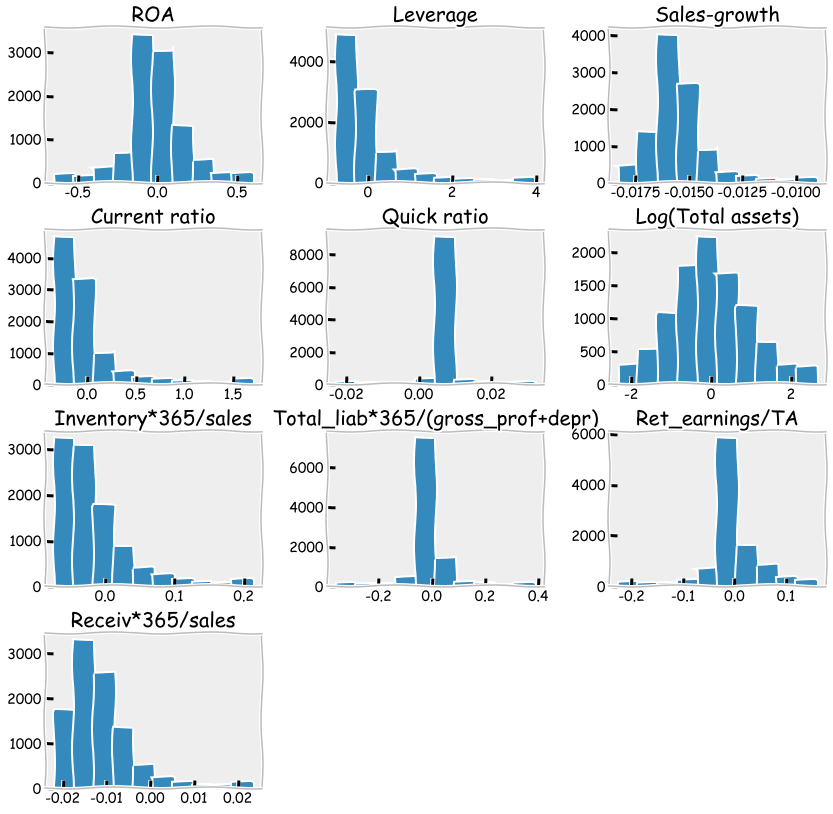

In [25]:
table_df.hist(figsize=(14,14),grid=False)
plt.show()

With **corr()** you can check the correlations. The variables we aim to use as predictor should not correlate too much if we use the traditional linear regression model. This problem is called multicollinearity. However, for example, with ensemble methods, multicollinearity is much less of a problem.

In [26]:
table_df.corr()

,ROA,Leverage,Sales-growth,Current ratio,Quick ratio,Log(Total assets),Inventory*365/sales,Total_liab*365/(gross_prof+depr),Ret_earnings/TA,Receiv*365/sales
ROA,1.000000,0.253631,0.198471,0.239780,0.073774,-0.022929,-0.199351,0.031788,0.482101,-0.088218
Leverage,0.253631,1.000000,-0.062703,0.678369,0.137512,0.092470,0.017957,-0.088598,0.277234,-0.007704
Sales-growth,0.198471,-0.062703,1.000000,-0.050987,0.008612,0.124345,-0.080525,0.005148,0.008116,-0.018546
Current ratio,0.239780,0.678369,-0.050987,1.000000,0.175938,-0.055648,0.143823,-0.059035,0.169986,0.097054
Quick ratio,0.073774,0.137512,0.008612,0.175938,1.000000,-0.009259,-0.067865,-0.067402,0.071122,0.026820
Log(Total assets),-0.022929,0.092470,0.124345,-0.055648,-0.009259,1.000000,0.065786,0.009114,0.199229,0.116596
Inventory*365/sales,-0.199351,0.017957,-0.080525,0.143823,-0.067865,0.065786,1.000000,0.026625,-0.109237,0.154436
Total_liab*365/(gross_prof+depr),0.031788,-0.088598,0.005148,-0.059035,-0.067402,0.009114,0.026625,1.000000,0.005612,0.018199
Ret_earnings/TA,0.482101,0.277234,0.008116,0.169986,0.071122,0.199229,-0.109237,0.005612,1.000000,-0.052223
Receiv*365/sales,-0.088218,-0.007704,-0.018546,0.097054,0.026820,0.116596,0.154436,0.018199,-0.052223,1.000000


The following statement constructs an indicator variable to the dataframe that has a value one if the ROA of that company is larger than zero (and zero otherwise). In the following models, we try to classify the companies into these two categories.

In [27]:
table_df['ROA_ind'] = table_df['ROA']>0

We use as predictors everything else except ROA and ROA_ind.

In [28]:
X_class = table_df.drop(['ROA','ROA_ind'],axis=1)

Predicted variable is the indicator variable ROA_ind. (ROA > 0 --> 1, ROA < 0 --> 0)

In [29]:
y_class = table_df['ROA_ind']

*train_test_split* can be used to easily divide a dataset to training and testing parts.

In [30]:
from sklearn.model_selection import train_test_split

Let's use a 80%/20% split for training and testing.

In [31]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=1)

The workflow with Scikit-learn is almost always the same. Define a model object, fit data to the object, analyse the results using the functions of the object. Let's start examining different ML classifiers with linear discriminant analysis.

#### Linear discriminant analysis

Linear discriminant analysis was the method Edward Altman used in his seminal bankruptcy prediction paper.

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Define the LDA object.

In [33]:
LDA_class = LinearDiscriminantAnalysis()

Fit the data to the model using the *fit* function of the object.

In [34]:
LDA_class.fit(X_train,y_train)

LinearDiscriminantAnalysis()

*score* measures the correct prediction rate. 73.95 % of the companies in the test data are catgorised correctly.

In [35]:
LDA_class.score(X_test,y_test)

0.7335

*classification_report* is a convenient tool to quickly calculate many popular classification metrics.

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test,LDA_class.predict(X_test)))

              precision    recall  f1-score   support

       False       0.72      0.85      0.78      1094
        True       0.76      0.60      0.67       906

    accuracy                           0.73      2000
   macro avg       0.74      0.72      0.72      2000
weighted avg       0.74      0.73      0.73      2000



*log_loss* is the same as binary cross-entropy we discussed in the theory part of this chapter.

In [38]:
from sklearn.metrics import log_loss

In [39]:
log_loss(y_test,LDA_class.predict(X_test))

9.204651075427833

A ROC curve for the LDA model. Remember, the more it bends to the top-left corner, the better.

In [40]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve

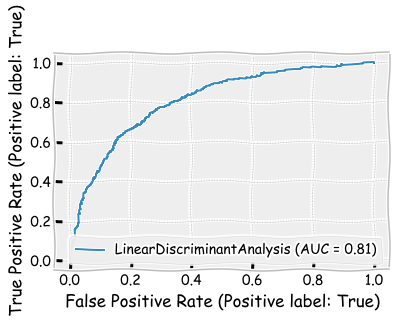

In [41]:
plot_roc_curve(LDA_class,X_test,y_test)
plt.show()

As we discussed,  precision-recall curve is especially suitable for imbalanced data (the sizes of the categories are not equal). The more the line bends to the upper-*right* corner, the better.

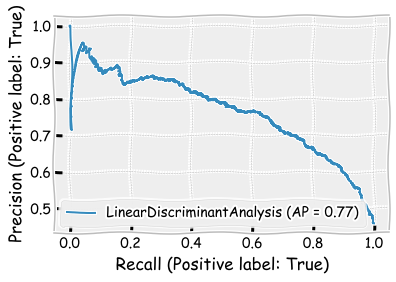

In [42]:
plot_precision_recall_curve(LDA_class,X_test,y_test)
plt.show()

#### K nearest neigbours
Let's next investigate the K nearest neighbours -method. Overall the model appears to perform little worse when compared to the LDA model. However, the recall metric for the ROA > 0 class is better. *n_neighbors=3* defines that the classification is based on the three closest samples in the training set.

In [43]:
from sklearn.neighbors import KNeighborsClassifier
neigh_cls = KNeighborsClassifier(n_neighbors=3)
neigh_cls.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
neigh_cls.score(X_test,y_test)

0.691

In [45]:
print(classification_report(y_test,neigh_cls.predict(X_test)))

              precision    recall  f1-score   support

       False       0.72      0.71      0.71      1094
        True       0.66      0.67      0.66       906

    accuracy                           0.69      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.69      0.69      0.69      2000



In [46]:
log_loss(y_test,neigh_cls.predict(X_test))

10.672609441817517

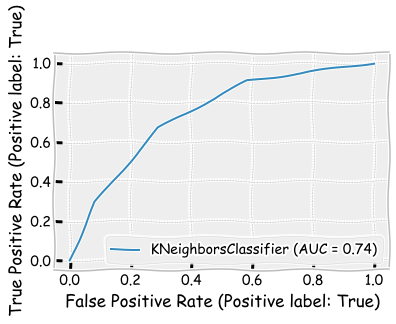

In [47]:
plot_roc_curve(neigh_cls,X_test,y_test)
plt.show()

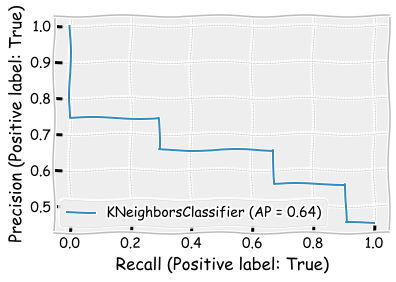

In [48]:
plot_precision_recall_curve(neigh_cls,X_test,y_test)
plt.show()

Let's see how results change when change the *n_neighbors* parameter to 5. There are only minor changes in the results. The precision metric and the F1 score is slightly better, when *n_neighbors=5*.

In [49]:
neigh_cls = KNeighborsClassifier(n_neighbors=5)
neigh_cls.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
neigh_cls.score(X_test,y_test)

0.6935

In [51]:
print(classification_report(y_test,neigh_cls.predict(X_test)))

              precision    recall  f1-score   support

       False       0.72      0.71      0.72      1094
        True       0.66      0.67      0.67       906

    accuracy                           0.69      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.69      0.69      0.69      2000



In [52]:
log_loss(y_test,neigh_cls.predict(X_test))

10.58626170123281

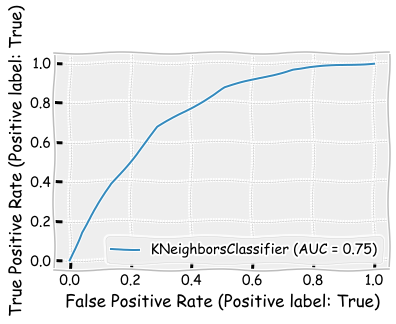

In [53]:
plot_roc_curve(neigh_cls,X_test,y_test)
plt.show()

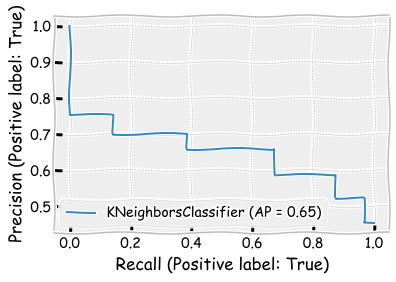

In [54]:
plot_precision_recall_curve(neigh_cls,X_test,y_test)
plt.show()

#### Logistic regression
Let's continue with the logistic regression model. This was another classic methods used in bankruptcy prediction (Ohlson, 1980).

In [55]:
import sklearn.linear_model as sk_lm

In [56]:
logit_model = sk_lm.LogisticRegression()

In [57]:
logit_model.fit(X_train,y_train)

LogisticRegression()

Based on accuracy, performance is better than KNN but worse than LDA.

In [58]:
logit_model.score(X_test,y_test)

0.703

Interestinly, performance is very similar to two previous models, but the recall metric is better for the (ROA < 0) -class and worse for the (ROA > 0) -class, making the average recall to be approximately the same.

In [59]:
print(classification_report(y_test,logit_model.predict(X_test)))

              precision    recall  f1-score   support

       False       0.68      0.86      0.76      1094
        True       0.75      0.51      0.61       906

    accuracy                           0.70      2000
   macro avg       0.72      0.69      0.69      2000
weighted avg       0.71      0.70      0.69      2000



In [60]:
log_loss(y_test,logit_model.predict(X_test))

10.258077358693168

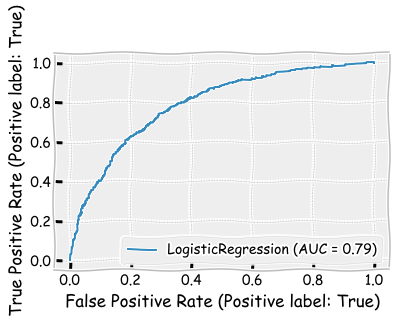

In [61]:
plot_roc_curve(logit_model,X_test,y_test)
plt.show()

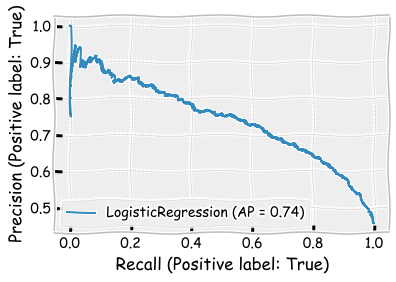

In [62]:
plot_precision_recall_curve(logit_model,X_test,y_test)
plt.show()

#### Support vector machines

Usually SVMs are powerfull classifiers, but for this data, they do not perform better than the previous models.

In [63]:
from sklearn import svm

Kernel can be thought as the type of the separation zone between the categories. **Linear**  is the simplest.

In [64]:
svm_classifier = svm.SVC(kernel='linear')

In [65]:
svm_classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [66]:
svm_classifier.score(X_test,y_test)

0.6915

Again, the average metrics are close to the performance of the previous models. However, again the recall metric has poor performance for the (ROA > 0) class and good performance for the (ROA < 0) class.

In [67]:
print(classification_report(y_test,svm_classifier.predict(X_test)))

              precision    recall  f1-score   support

       False       0.66      0.91      0.76      1094
        True       0.79      0.43      0.56       906

    accuracy                           0.69      2000
   macro avg       0.73      0.67      0.66      2000
weighted avg       0.72      0.69      0.67      2000



In [68]:
log_loss(y_test,svm_classifier.predict(X_test))

10.655252897500171

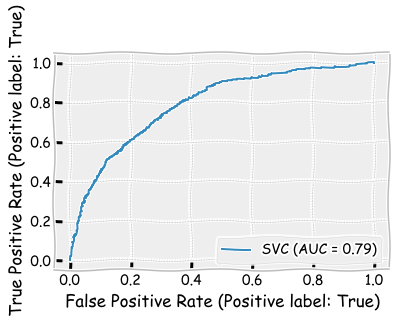

In [69]:
plot_roc_curve(svm_classifier,X_test,y_test)
plt.show()

Area under the precision-recall curve is the best so far (0.75).

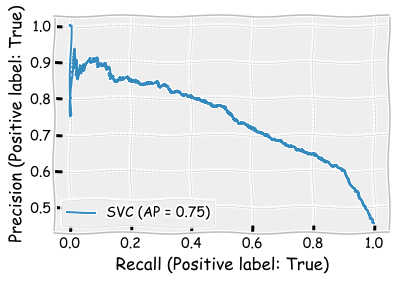

In [70]:
plot_precision_recall_curve(svm_classifier,X_test,y_test)
plt.show()

Radial basis function is a more powerful kernel for SVMs. Using it slightly improves the results and makes the SVM the best model so far according to different metrics. Only the area under ROC is better in the LDA model.

In [71]:
svm_classifier = svm.SVC(kernel='rbf')

In [72]:
svm_classifier.fit(X_train,y_train)

SVC()

The results improve slightly but are still not as good as with the LDA model.

In [73]:
svm_classifier.score(X_test,y_test)

0.725

In [74]:
print(classification_report(y_test,svm_classifier.predict(X_test)))

              precision    recall  f1-score   support

       False       0.71      0.85      0.77      1094
        True       0.76      0.58      0.65       906

    accuracy                           0.73      2000
   macro avg       0.73      0.71      0.71      2000
weighted avg       0.73      0.72      0.72      2000



In [75]:
log_loss(y_test,svm_classifier.predict(X_test))

9.498229475388431

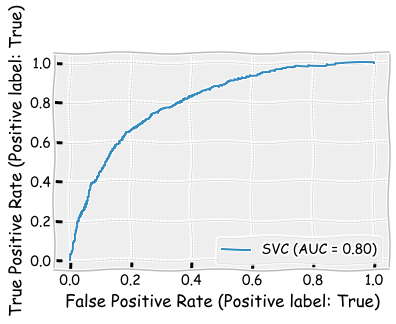

In [76]:
plot_roc_curve(svm_classifier,X_test,y_test)
plt.show()

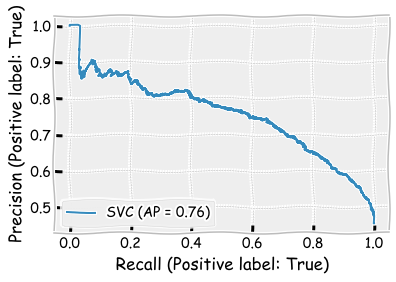

In [77]:
plot_precision_recall_curve(svm_classifier,X_test,y_test)
plt.show()

#### Decision trees

Decision tree uses features to categorise companies to different branches.

In [78]:
from sklearn import tree

*max_depth* defines how many times new branches are created in the tree (see the figure below).

In [79]:
tree_class = tree.DecisionTreeClassifier(max_depth=3)

In [80]:
tree_class.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

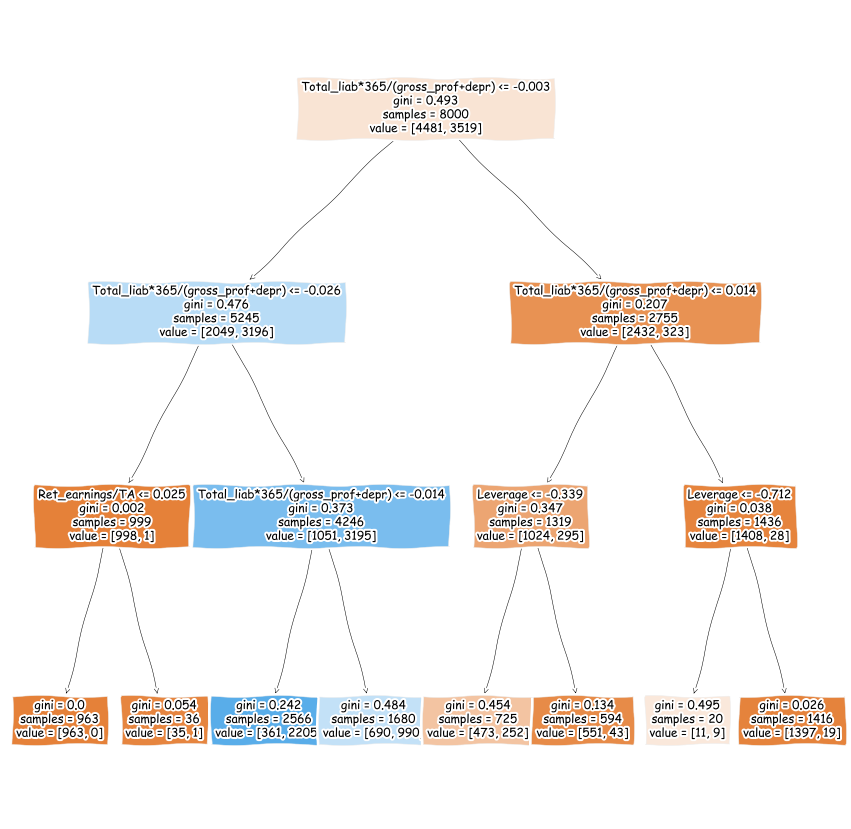

In [81]:
plt.figure(figsize=(15,15))
tree.plot_tree(tree_class,feature_names=X_train.columns,fontsize=12,filled=True)
plt.show()

The decision tree model has the best performance so far.

In [82]:
tree_class.score(X_test,y_test)

0.839

In [83]:
print(classification_report(y_test,tree_class.predict(X_test)))

              precision    recall  f1-score   support

       False       0.91      0.79      0.84      1094
        True       0.78      0.90      0.84       906

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.85      0.84      0.84      2000



In [84]:
log_loss(y_test,tree_class.predict(X_test))

5.5608369522786685

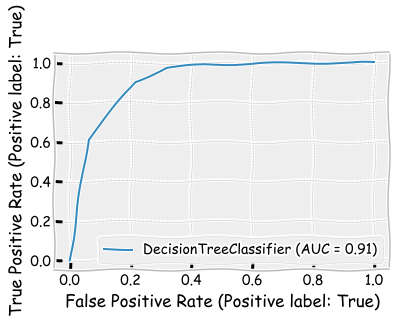

In [85]:
plot_roc_curve(tree_class,X_test,y_test)

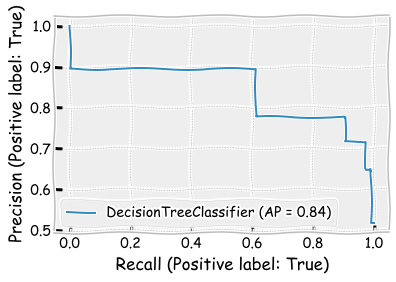

In [86]:
plot_precision_recall_curve(tree_class,X_test,y_test)
plt.show()

#### Naive Bayes
Let's continue with a Naive Bayes -model. We use the Gaussian Naive Bayes model in Scikit-learn.

In [87]:
from sklearn.naive_bayes import GaussianNB
naive_clf = GaussianNB()
naive_clf.fit(X_train, y_train)

GaussianNB()

The results are almost as good as the results of the decision tree model.

In [88]:
naive_clf.score(X_test,y_test)

0.8005

In [89]:
print(classification_report(y_test,naive_clf.predict(X_test)))

              precision    recall  f1-score   support

       False       0.91      0.71      0.80      1094
        True       0.72      0.91      0.81       906

    accuracy                           0.80      2000
   macro avg       0.81      0.81      0.80      2000
weighted avg       0.82      0.80      0.80      2000



In [90]:
log_loss(y_test,naive_clf.predict(X_test))

6.890613026776083

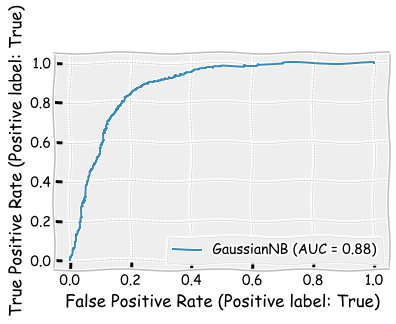

In [91]:
plot_roc_curve(naive_clf,X_test,y_test)
plt.show()

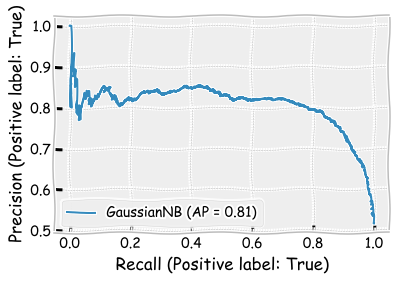

In [92]:
plot_precision_recall_curve(naive_clf,X_test,y_test)
plt.show()

#### Random forest

If the decision tree model was performing so well, we could anticipate that many decision trees (= random forest) would perform even better.

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rf_class = RandomForestClassifier()

In [95]:
rf_class.fit(X_train,y_train)

RandomForestClassifier()

With the random forest classifier, there is an additonal possibility to rank the improtance of the features. The calculated importance is called *Gini importance*.

In [96]:
pd.DataFrame([X_train.columns,rf_class.feature_importances_]).transpose().sort_values(1,ascending=False)

,0,1
6,Total_liab*365/(gross_prof+depr),0.395666
7,Ret_earnings/TA,0.147671
0,Leverage,0.115949
1,Sales-growth,0.074085
2,Current ratio,0.065185
3,Quick ratio,0.059002
4,Log(Total assets),0.050552
5,Inventory*365/sales,0.049746
8,Receiv*365/sales,0.042145


The performance is clearly the best one so far when measured using all the metrics.

In [81]:
rf_class.score(X_test,y_test)

0.8945

In [82]:
print(classification_report(y_test,rf_class.predict(X_test)))

              precision    recall  f1-score   support

       False       0.90      0.91      0.90      1094
        True       0.89      0.88      0.88       906

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



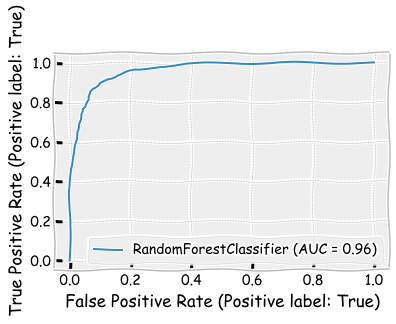

In [83]:
plot_roc_curve(rf_class,X_test,y_test)
plt.show()

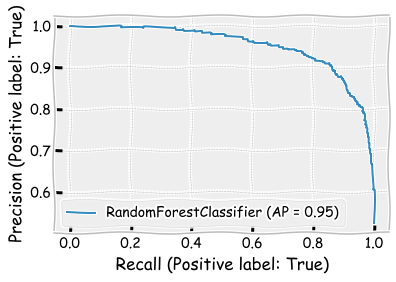

In [84]:
plot_precision_recall_curve(rf_class,X_test,y_test)
plt.show()

#### Boosting classifier

The boosting classifier model is very similar to the random forest model. For example, they both use decision trees as weak classifiers. Thus, the performance is probably very close to the performance of the random forest model.

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
boosting_clf = GradientBoostingClassifier()

In [87]:
boosting_clf.fit(X_train,y_train)

GradientBoostingClassifier()

In [88]:
pd.DataFrame([X_train.columns,boosting_clf.feature_importances_]).transpose().sort_values(1,ascending=False)

,0,1
6,Total_liab*365/(gross_prof+depr),0.780337
0,Leverage,0.100223
7,Ret_earnings/TA,0.075315
1,Sales-growth,0.023974
4,Log(Total assets),0.006188
3,Quick ratio,0.005888
2,Current ratio,0.003503
5,Inventory*365/sales,0.00249
8,Receiv*365/sales,0.002083


The performance is slightly better than the performance of the random forest model. Furthermore, the boosting model has the best performance of all the models.

In [89]:
boosting_clf.score(X_test,y_test)

0.898

In [90]:
print(classification_report(y_test,boosting_clf.predict(X_test)))

              precision    recall  f1-score   support

       False       0.91      0.91      0.91      1094
        True       0.89      0.89      0.89       906

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



In [91]:
log_loss(y_test,boosting_clf.predict(X_test))

3.522995571951115

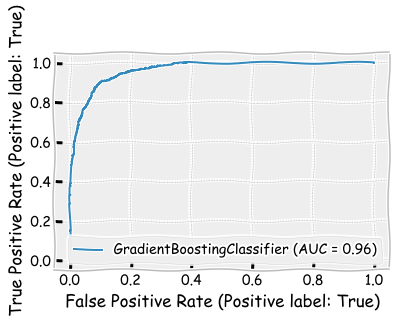

In [92]:
plot_roc_curve(boosting_clf,X_test,y_test)
plt.show()

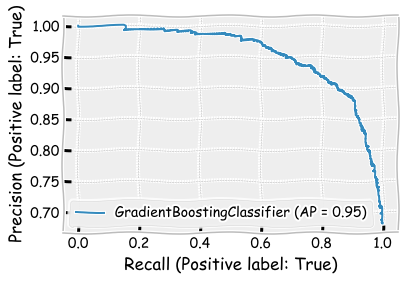

In [111]:
plot_precision_recall_curve(boosting_clf,X_test,y_test)
plt.show()

### Unsupervised approach

It is difficult to design a meaningful unsupervised classification (clustering) example from the data at hand. Thus, we investigate unsupervised methods using the Iris dataset included in Scikit-learn. We will encounter more accounting-related unsupervised methods in Chapter 10, where we discuss ML text analysis methods in accounting.

In [101]:
from sklearn.datasets import load_iris

The Iris dataset consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features are included: the length and the width of the sepals and petals. Our aim is to use an unsupervised method to separate these three flower types using the four features.

In [102]:
iris_data = load_iris()

In [103]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [104]:
iris_df = pd.DataFrame(iris_data['data'],columns=iris_data['feature_names'])

In [105]:
iris_df['Flower'] = iris_data['target']

In [106]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


As you can see from the figure below. Setosa should be easy to separate. Versicolor and Virginica is probably more difficult.

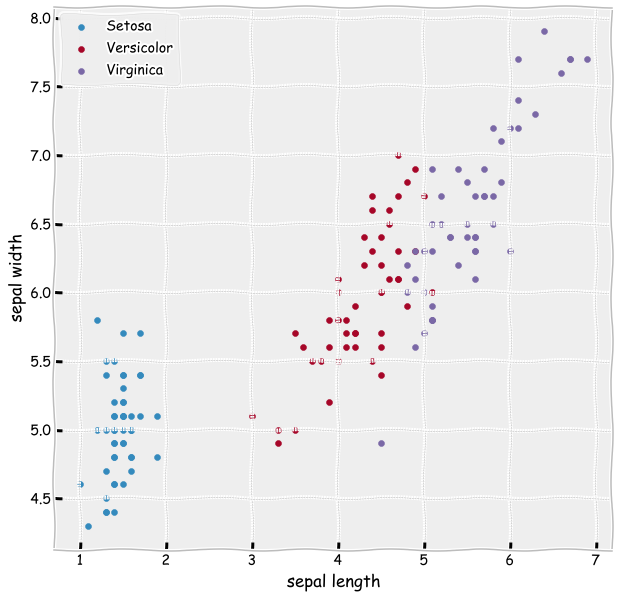

In [107]:
ax = plt.subplots(figsize=(10,10))
plt.scatter(iris_df['petal length (cm)'][iris_df['Flower'] == 0],
            iris_df['sepal length (cm)'][iris_df['Flower'] == 0],label='Setosa')
plt.scatter(iris_df['petal length (cm)'][iris_df['Flower'] == 1],
            iris_df['sepal length (cm)'][iris_df['Flower'] == 1],label='Versicolor')
plt.scatter(iris_df['petal length (cm)'][iris_df['Flower'] == 2],
            iris_df['sepal length (cm)'][iris_df['Flower'] == 2],label='Virginica')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

Let's construt a K-means clustering model and fit it to the data. As a parameter, we need to define how many clusters we want to have.

In [108]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)

Here we try to learn the clusters using only two features, the petal length and the sepal length.

In [109]:
results  = kmeans.fit(iris_df[['petal length (cm)','sepal length (cm)']])

In [110]:
iris_df['clusters']= results.labels_

In [111]:
centers = results.cluster_centers_

The cluster centers learned by the model are quite good. The learned clustes are almost the same as the correct categories in the previous figure.

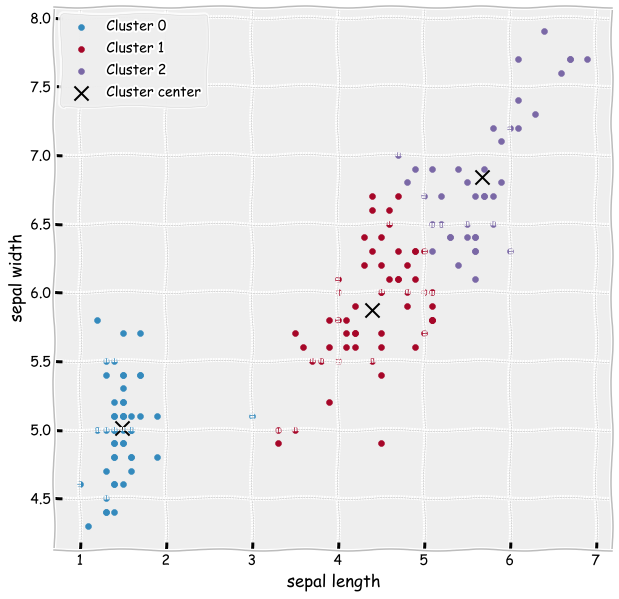

In [112]:
ax = plt.subplots(figsize=(10,10))
plt.scatter(iris_df['petal length (cm)'][iris_df['clusters'] == 0],
            iris_df['sepal length (cm)'][iris_df['clusters'] == 0],label='Cluster 0')
plt.scatter(iris_df['petal length (cm)'][iris_df['clusters'] == 1],
            iris_df['sepal length (cm)'][iris_df['clusters'] == 1],label='Cluster 1')
plt.scatter(iris_df['petal length (cm)'][iris_df['clusters'] == 2],
            iris_df['sepal length (cm)'][iris_df['clusters'] == 2],label='Cluster 2')
plt.scatter(centers[:,0],centers[:,1],s=200,color='k',marker='x',label='Cluster center')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

The bar plots below can be used to check how many misclassified observations there were.

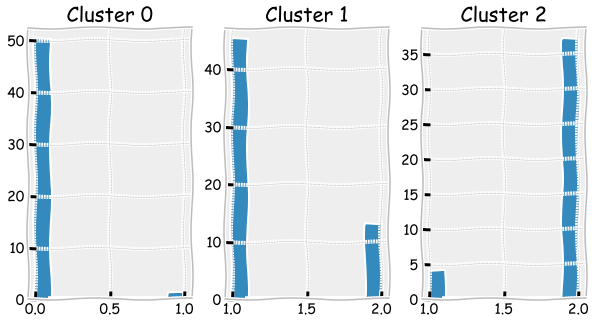

In [113]:
fig, axs = plt.subplots(1,3,figsize=(10,5),squeeze=True)
for cluster,ax in zip(range(0,3),axs.flat):
    ax.hist(iris_df['Flower'][iris_df['clusters']==cluster])
    ax.set_title('Cluster ' + str(cluster))

Let's now use all the variables in the clustering model.

In [114]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)

In [115]:
results  = kmeans.fit(iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']])

In [116]:
iris_df['clusters']= results.labels_

In [118]:
centers = results.cluster_centers_

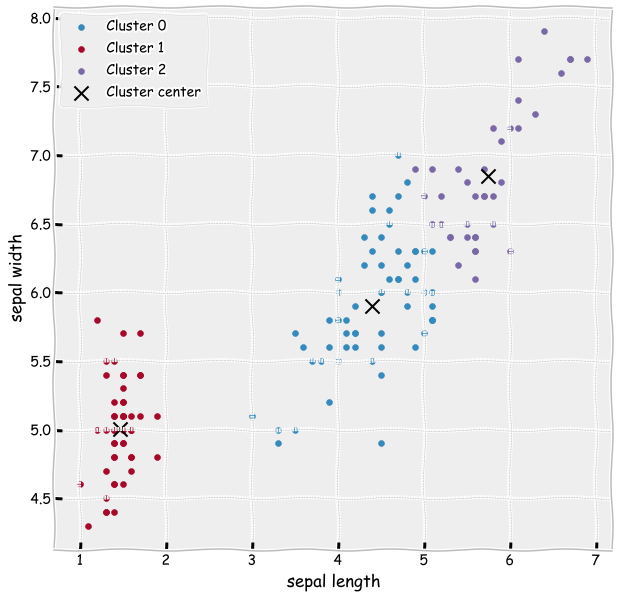

In [119]:
ax = plt.subplots(figsize=(10,10))
plt.scatter(iris_df['petal length (cm)'][iris_df['clusters'] == 0],
            iris_df['sepal length (cm)'][iris_df['clusters'] == 0],label='Cluster 0')
plt.scatter(iris_df['petal length (cm)'][iris_df['clusters'] == 1],
            iris_df['sepal length (cm)'][iris_df['clusters'] == 1],label='Cluster 1')
plt.scatter(iris_df['petal length (cm)'][iris_df['clusters'] == 2],
            iris_df['sepal length (cm)'][iris_df['clusters'] == 2],label='Cluster 2')
plt.scatter(centers[:,2],centers[:,0],s=200,color='k',marker='x',label='Cluster center')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

The results slightly improve as there is less misclassified observations.

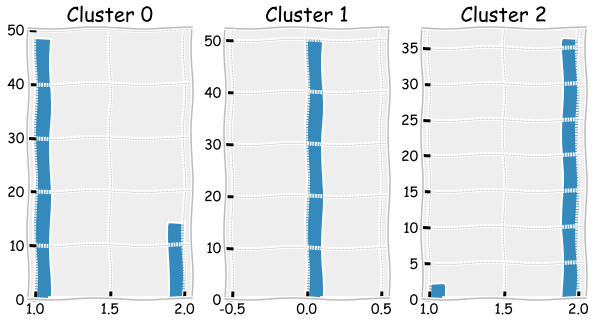

In [120]:
fig, axs = plt.subplots(1,3,figsize=(10,5),squeeze=True)
for cluster,ax in zip(range(0,3),axs.flat):
    ax.hist(iris_df['Flower'][iris_df['clusters']==cluster])
    ax.set_title('Cluster ' + str(cluster))